In [39]:
import tensorflow as tf
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.datasets import imdb

In [43]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [44]:
x_train = pad_sequences(x_train ,maxlen = 100,padding='pre')
x_test = pad_sequences(x_test ,maxlen = 100,padding='pre')

In [49]:
model = Sequential([
    Embedding(input_dim=10000,output_dim=32,input_shape=(100,)),
    LSTM(units=32,return_sequences= True),
    LSTM(units=32),
    Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,673 (1.28 MB)

 Trainable params: 336,673 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8478 - loss: 0.3938 - val_accuracy: 0.7522 - val_loss: 0.5178
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.7192 - loss: 1.8199 - val_accuracy: 0.7220 - val_loss: 0.5599
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8492 - loss: 0.4028 - val_accuracy: 0.7956 - val_loss: 0.5166
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8910 - loss: 0.2846 - val_accuracy: 0.8194 - val_loss: 0.5678
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9110 - loss: 0.2445 - val_accuracy: 0.8180 - val_loss: 0.6199


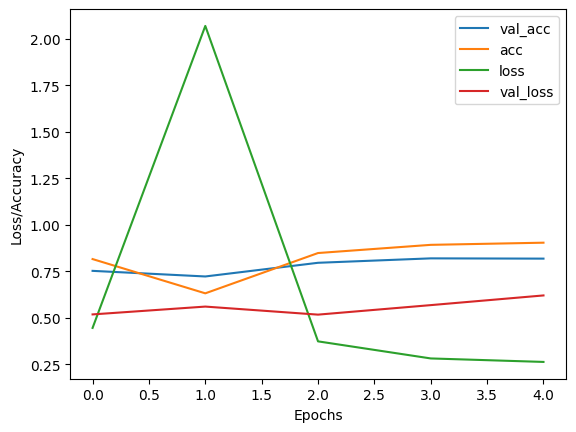

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'],label = "val_acc")
plt.plot(history.history['accuracy'],label = "acc")
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()